# Задание 12
Использовать явную схему для уравнения колебания струны. Построить график решения.

## Теория

### Уравнение колебания струны

Перемещение $u(x,t)$ описывается волновым уравнением:
$$\rho*u_{tt}(x,y)=Tu_{xx}(x,t),~0<x<L,~0<t<\infty,$$
и граничными условиями:
$$u(x,0)=f(x),~u_t(x,0)=g(x),$$
$$u(0,t)=0,~u(L,t)=0,$$
где $\rho$ - плотность массы струны, $T$ - натяжение струны. Обычно уравнение преобразуют к виду:
$$u_{tt}(x,y)=c^2u_{xx}(x,t).$$

После переобозначений и применения разностной схемы, получим:
$$u_{i,j+1}=(2-2r^2)u_{i,j}+r^2(u_{i+1,j}+u_{i-1,j})-u_{i,j-1},$$
где $r=ck/h$ ($\leq 1$ для гарантированной устойчивости).

Для вычисления значений на втором ряду, используют формулу (выводится из разложения в Тейлора второго порядка в $t=0$):
$$u_{i,2}=(1-r^2)f_i+kg_i+\frac{r^2}{2}(f_{i+1}+f_{i-1}).$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023)

%matplotlib widget

Для рассмотрения возьмем следующую задачу:
$$u_{tt}(x,t)=4u_{xx}(x,t),~0<x<1,~0<t<0.5,$$
$$u(0,t) = 0,~u(1,t) = 0,$$
$$u(x,0)=f(x)=\sin(\pi x)+\sin(2\pi x),$$
$$u_t(x,0)=g(x)=0.$$

In [2]:
def f(x):
    return np.sin(np.pi*x)+np.sin(2*np.pi*x)
def g(t):
    return t*0

In [3]:
num_dots_x = 20
num_dots_t = 40
x_grid = np.linspace(0,1,num_dots_x)
t_grid = np.linspace(0,0.5,num_dots_t)
u_values = np.zeros((num_dots_t,num_dots_x))

h = x_grid[1] - x_grid[0]
k = t_grid[1] - t_grid[0]

In [4]:
c = 2
r = c*k/h
print(r)
print(r <= 1)

0.48717948717948717
True


In [5]:
T, X = np.meshgrid(t_grid, x_grid)

$$u_{i,2}=(1-r^2)f_i+kg_i+\frac{r^2}{2}(f_{i+1}+f_{i-1})$$

In [6]:
u_values[:, 0] = np.linspace(0,0,num_dots_t)
u_values[:, -1] = np.linspace(0,0,num_dots_t)
u_values[0, 1:-1] = f(X[1:-1, 0])
u_values[1, 1:-1] = (1 - r**2)*f(X[1:-1, 0]) + k*g(X[1:-1, 0]) +\
                    r**2/2*(X[2:, 0]+X[:-2, 0])

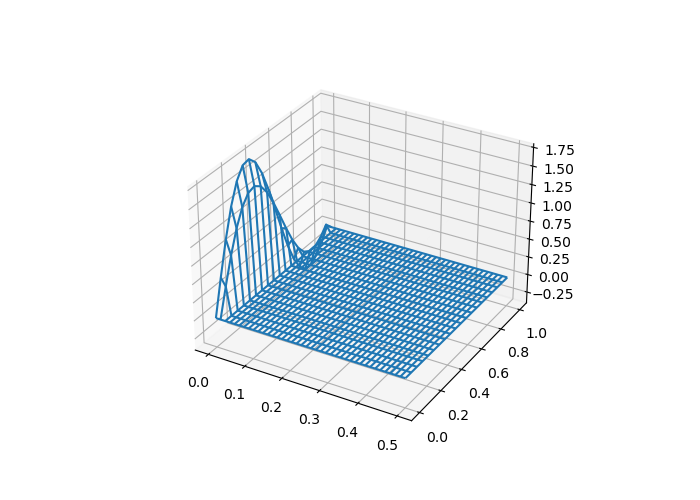

In [7]:
ax = plt.figure(figsize=(7,5)).add_subplot(projection='3d')

ax.plot_wireframe(T, X, u_values.T)

plt.show()

$$u_{i,j+1}=(2-2r^2)u_{i,j}+r^2(u_{i+1,j}+u_{i-1,j})-u_{i,j-1}$$

In [8]:
for i in range(2, num_dots_t):
    for j in range(1, num_dots_x - 1):
        u_values[i, j] = (2-2*r**2)*u_values[i-1,j] +\
                        r**2*(u_values[i-1,j+1] + u_values[i-1,j-1]) -\
                        u_values[i-2,j]

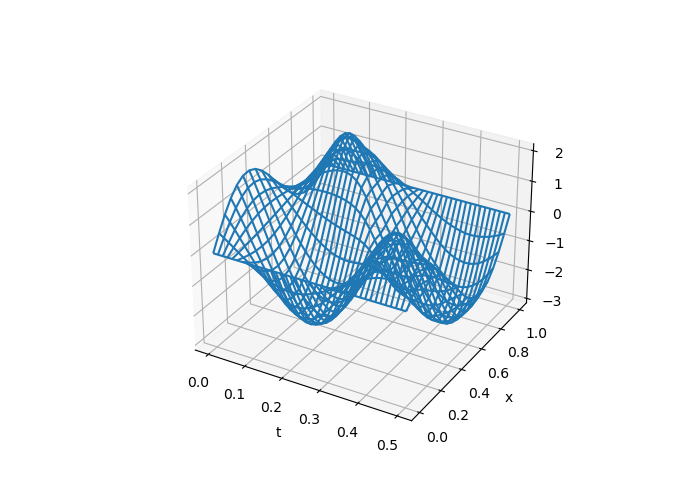

In [9]:
ax = plt.figure(figsize=(7,5)).add_subplot(projection='3d')

ax.plot_wireframe(T, X, u_values.T)
ax.set_xlabel('t')
ax.set_ylabel('x')

plt.show()